In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [7]:
!pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [33]:
data = pd.read_excel(r"C:\Users\NIHAL_MIRAJ\Desktop\EastWestAirlines.xlsx",sheet_name='data', engine='openpyxl')

In [34]:
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [35]:
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [36]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [38]:
print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [39]:
data.duplicated().sum()

1

In [40]:

data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


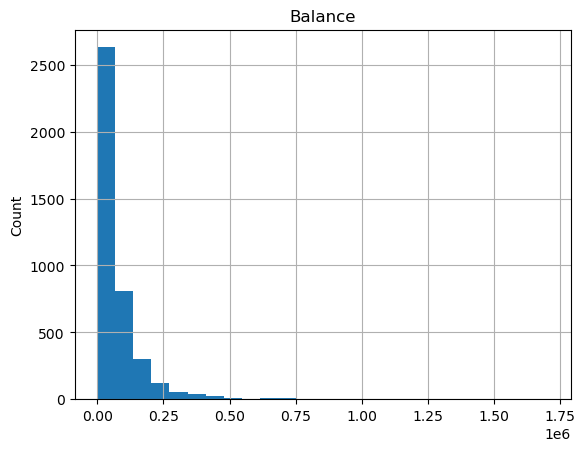

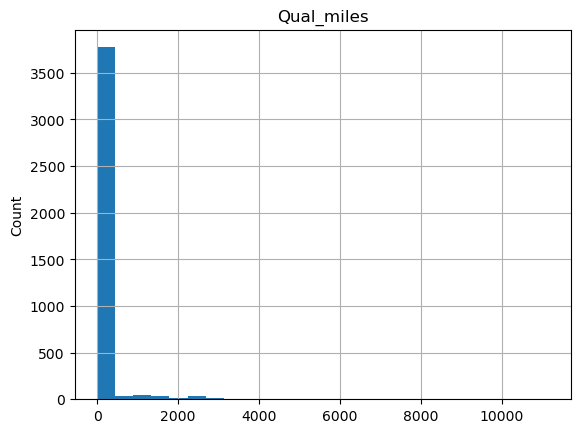

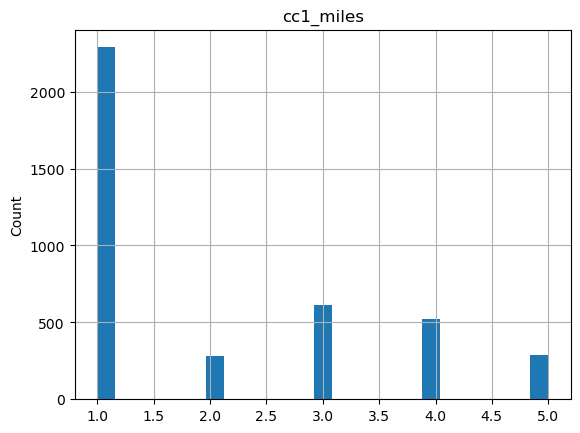

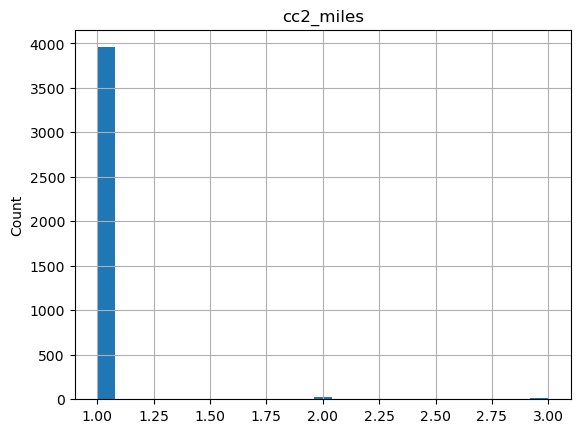

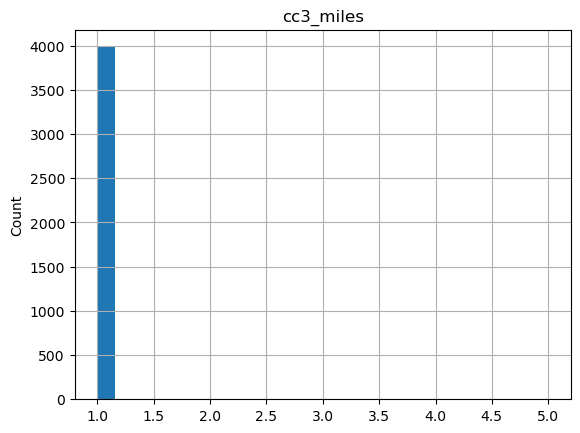

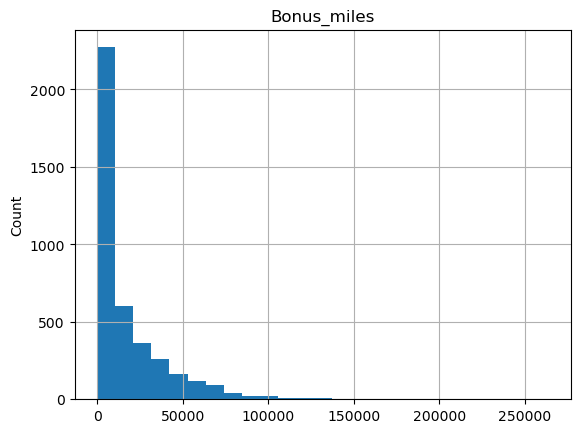

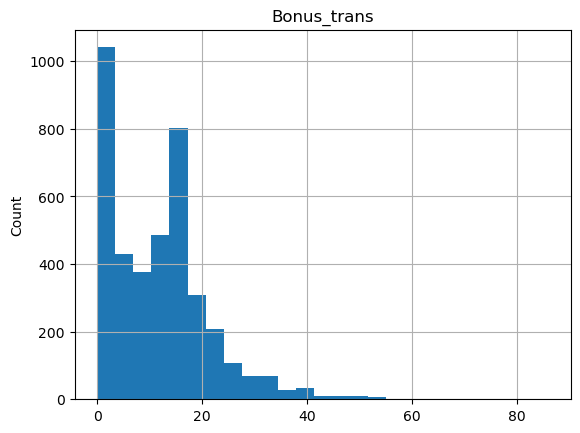

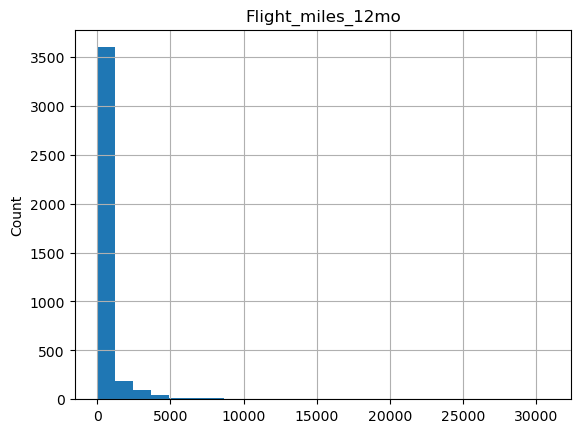

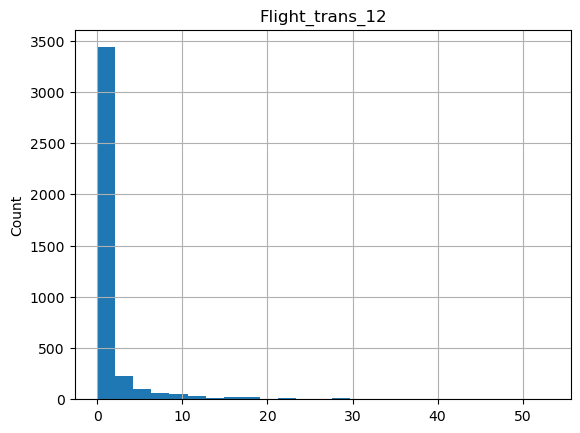

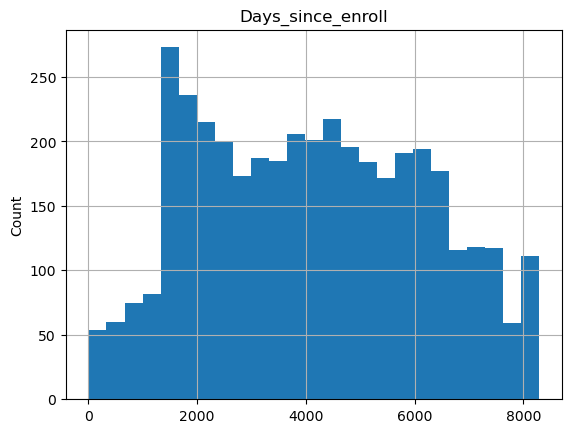

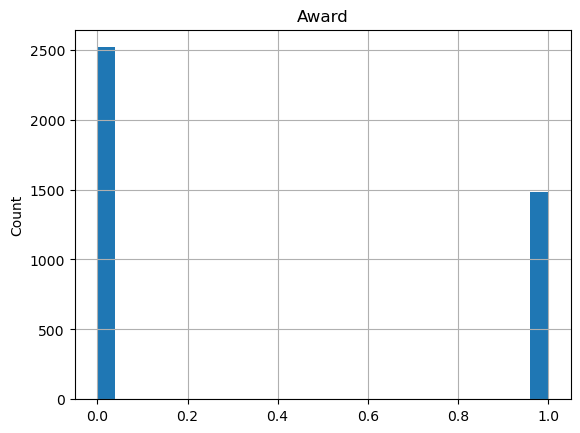

In [42]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


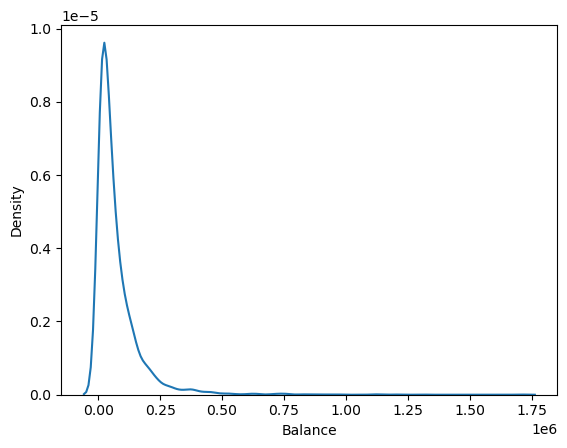

Qual_miles


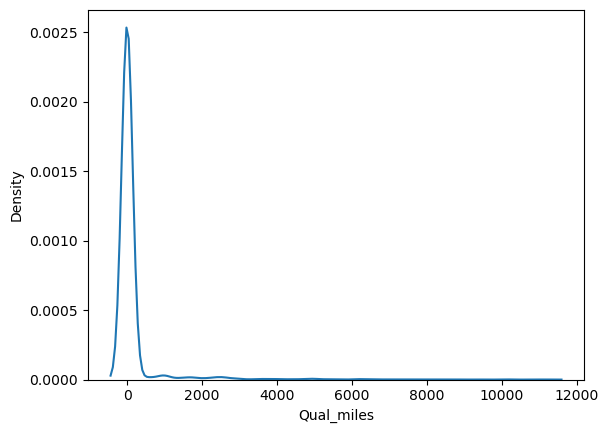

cc1_miles


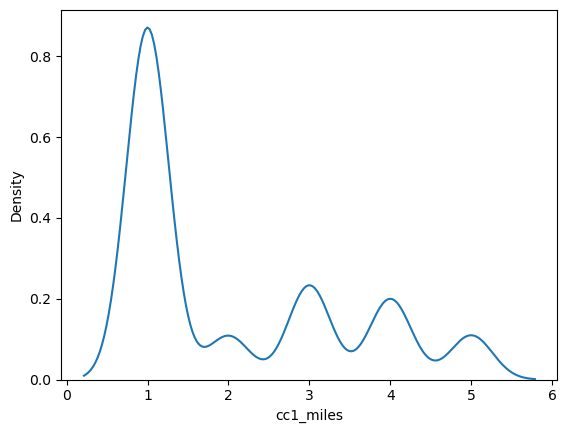

cc2_miles


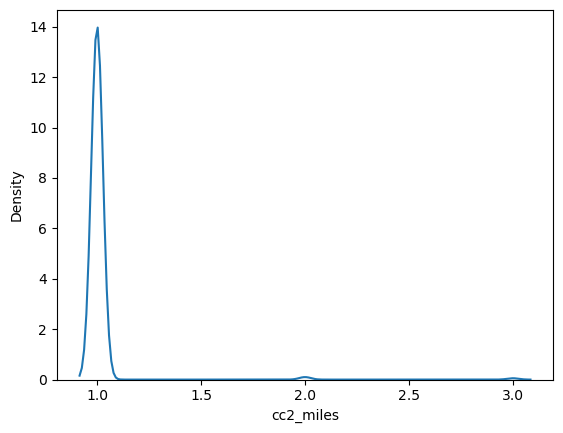

cc3_miles


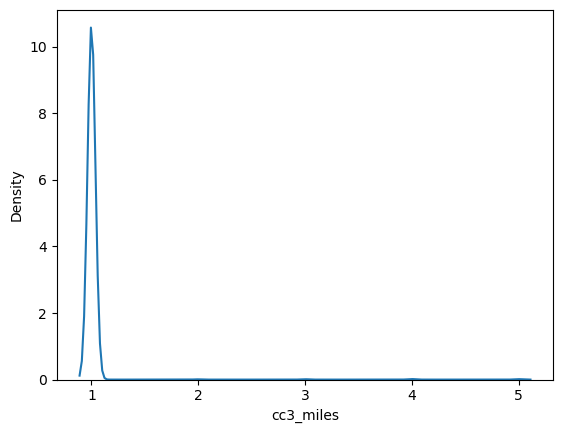

Bonus_miles


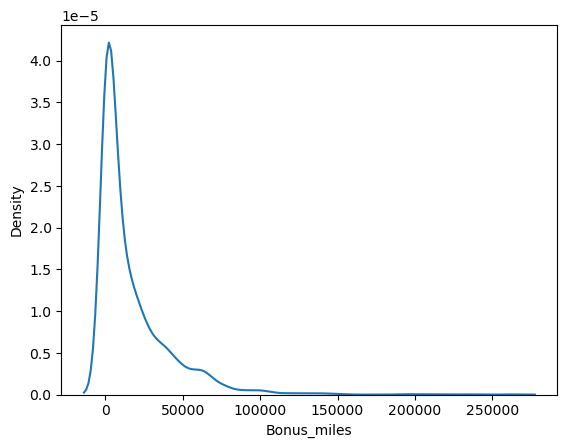

Bonus_trans


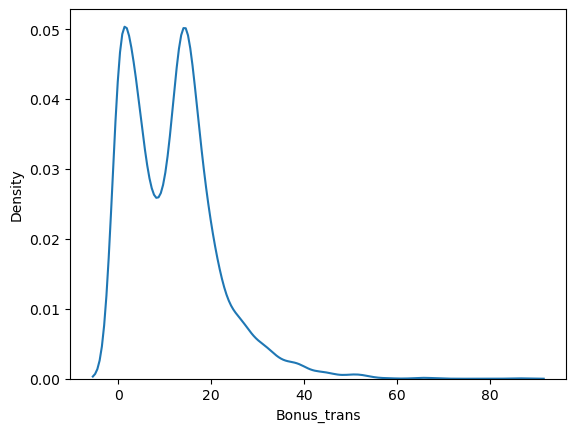

Flight_miles_12mo


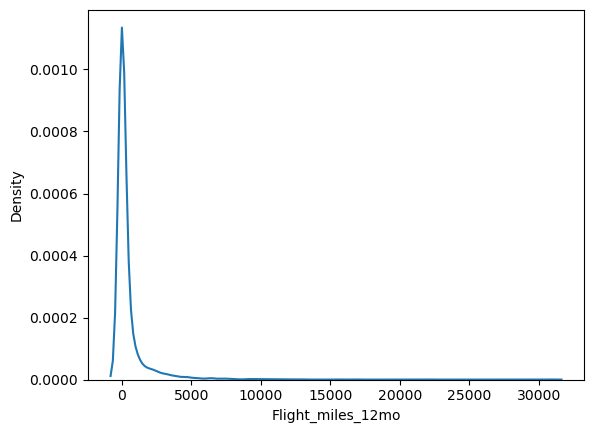

Flight_trans_12


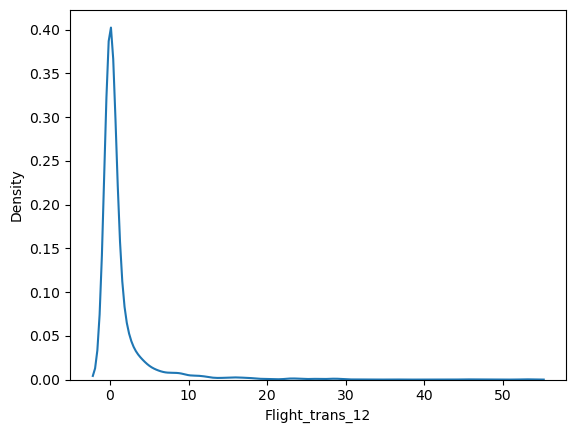

Days_since_enroll


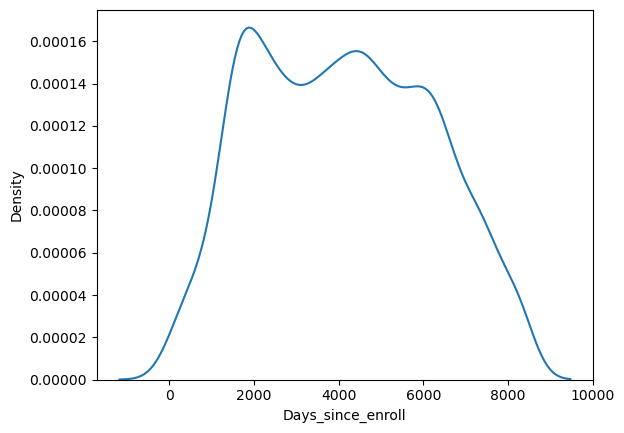

Award


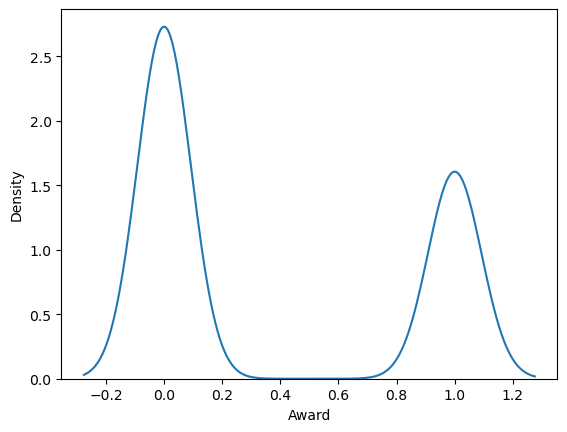

In [43]:
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

In [44]:
columns = [
    'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 
    'cc3_miles', 'Bonus_miles', 'Bonus_trans', 
    'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll'
]

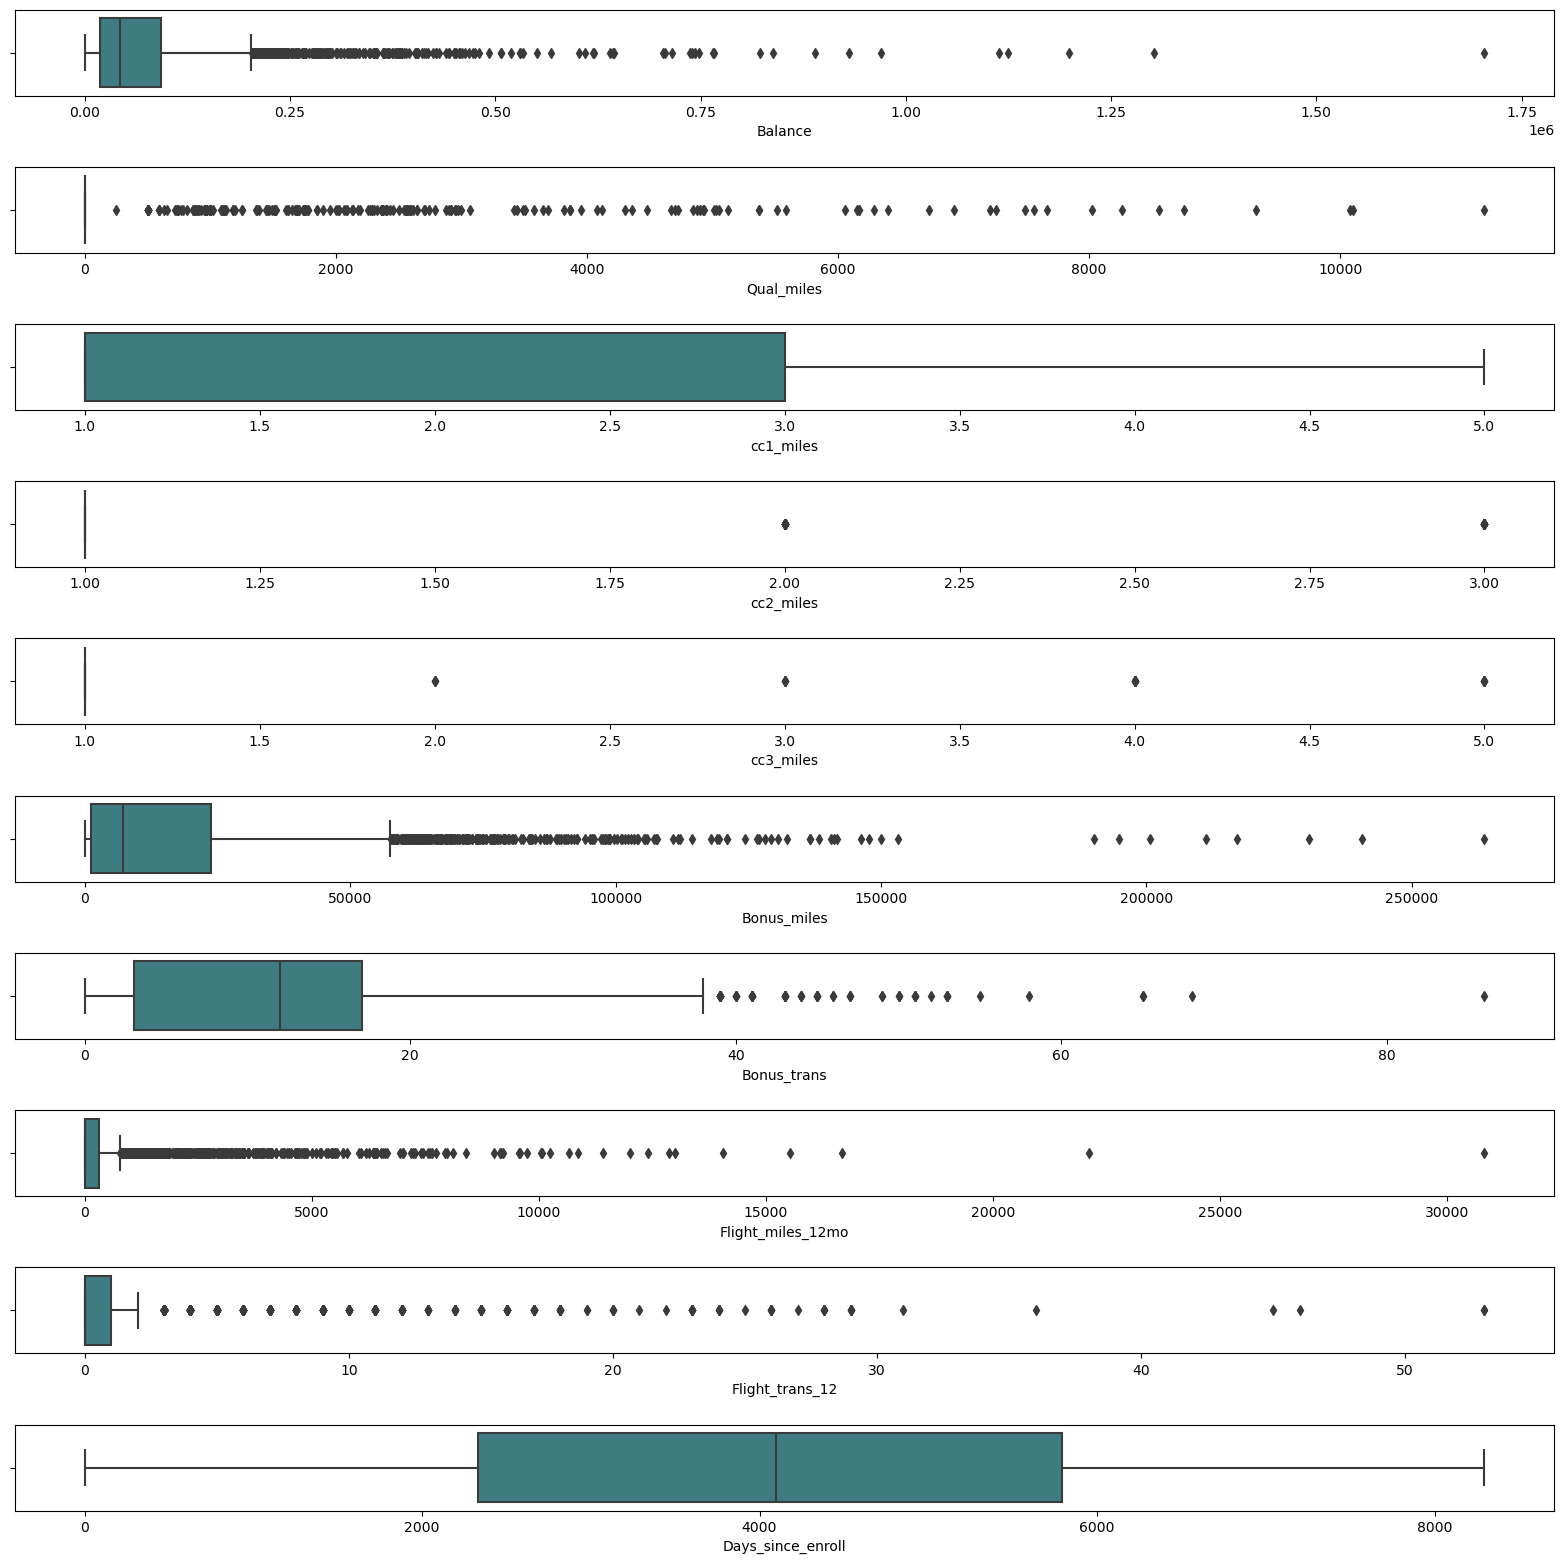

In [47]:
ot = data.copy()
fig, axes = plt.subplots(len(columns), 1, figsize=(16, 16), sharex=False, sharey=False)
for i, col in enumerate(columns):
    sns.boxplot(x=col, data=ot, palette='crest', ax=axes[i])

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

<Axes: >

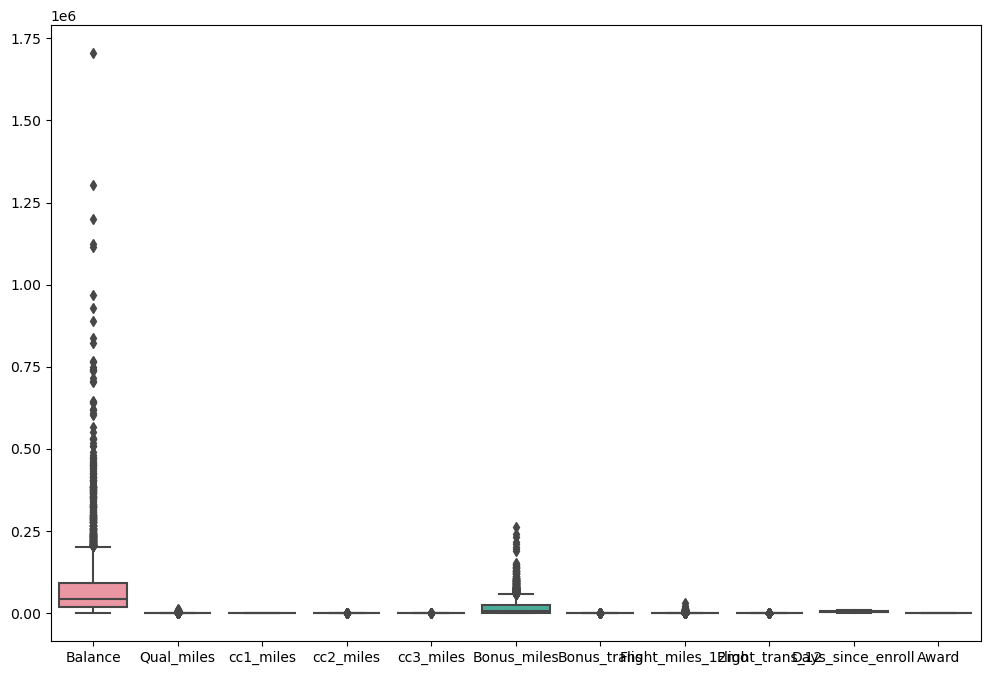

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

Text(0.5, 1.0, 'Whether the client has a Award or not ')

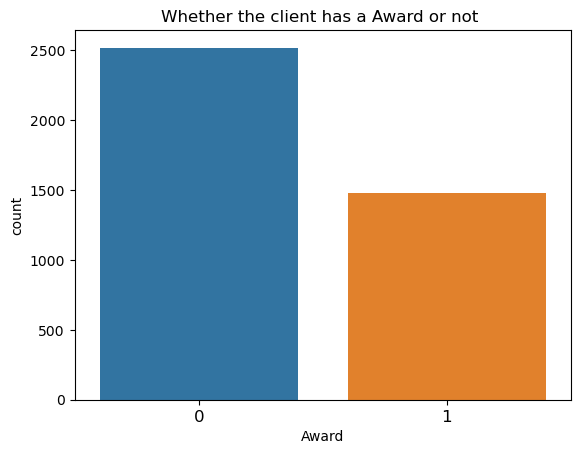

In [49]:
sns.countplot(x='Award', data=data, 
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

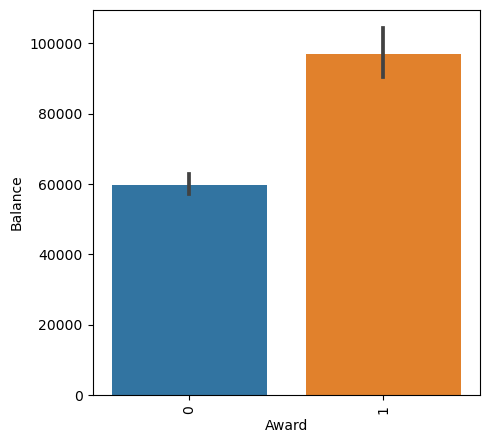

In [50]:
plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [51]:
corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

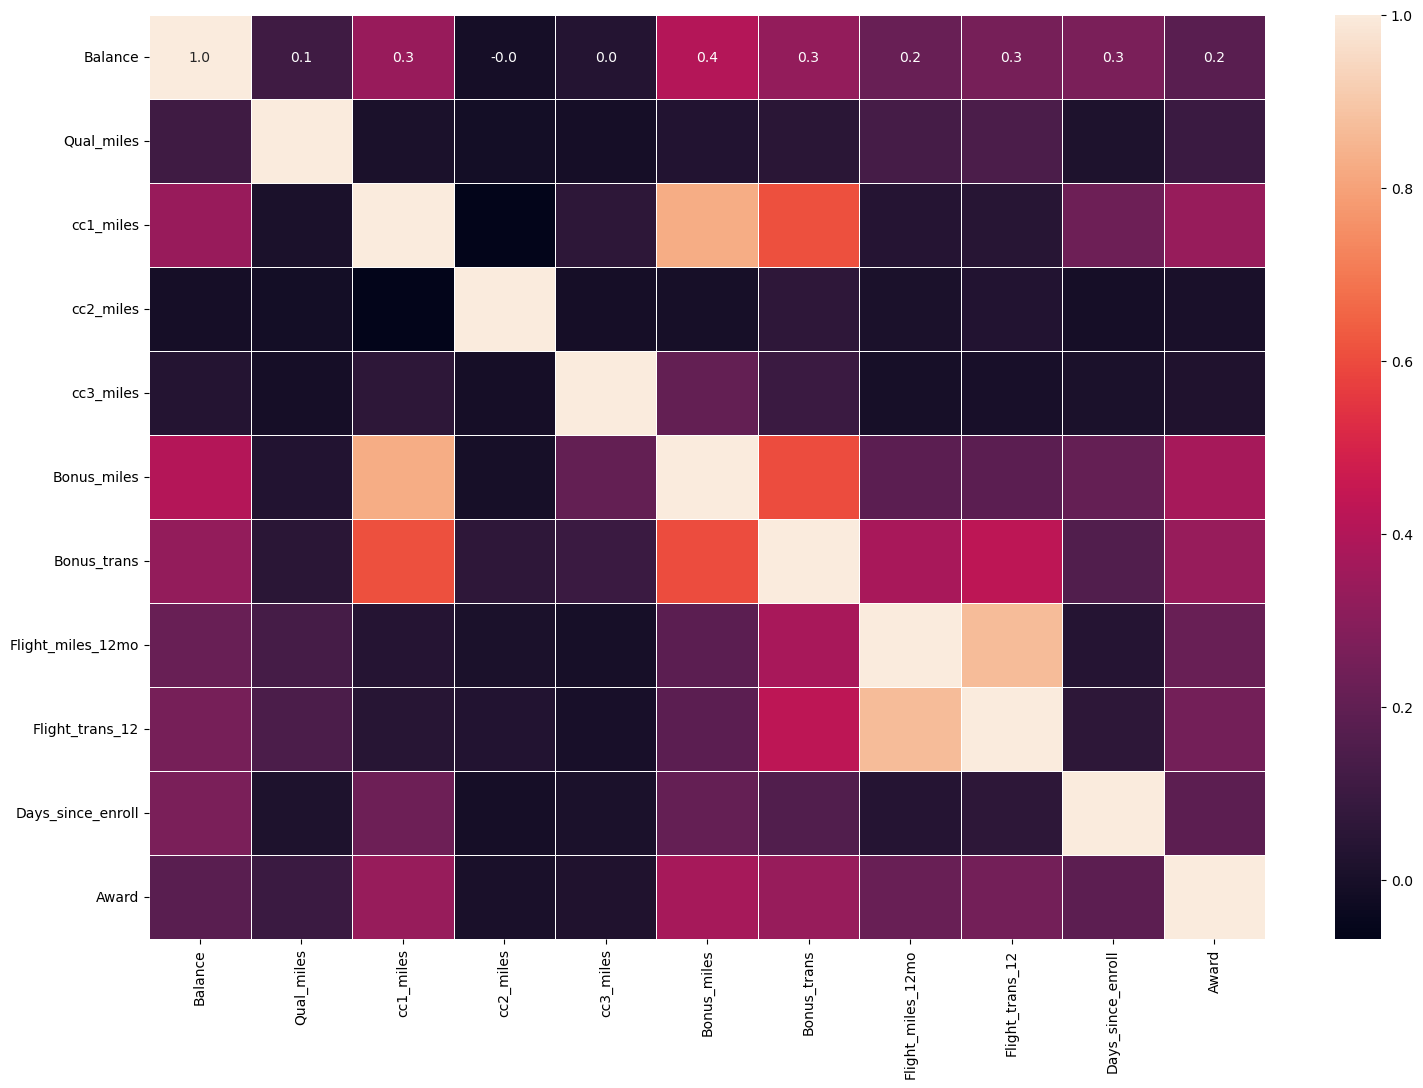

In [52]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [56]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [57]:
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)

In [67]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

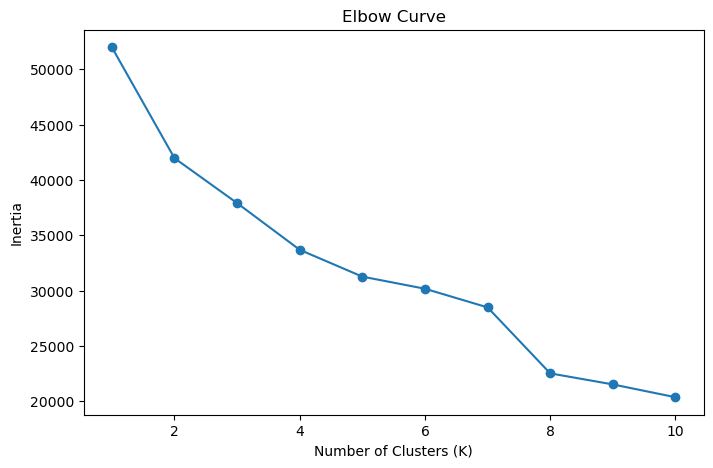

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [84]:
optimal_k =2  # Adjust based on Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

In [85]:
df['KMeans_Cluster'] = clusters_kmeans

In [86]:
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")

Silhouette Score for K-Means: 0.31


In [87]:
linkage_matrix = linkage(data_scaled, method='ward')

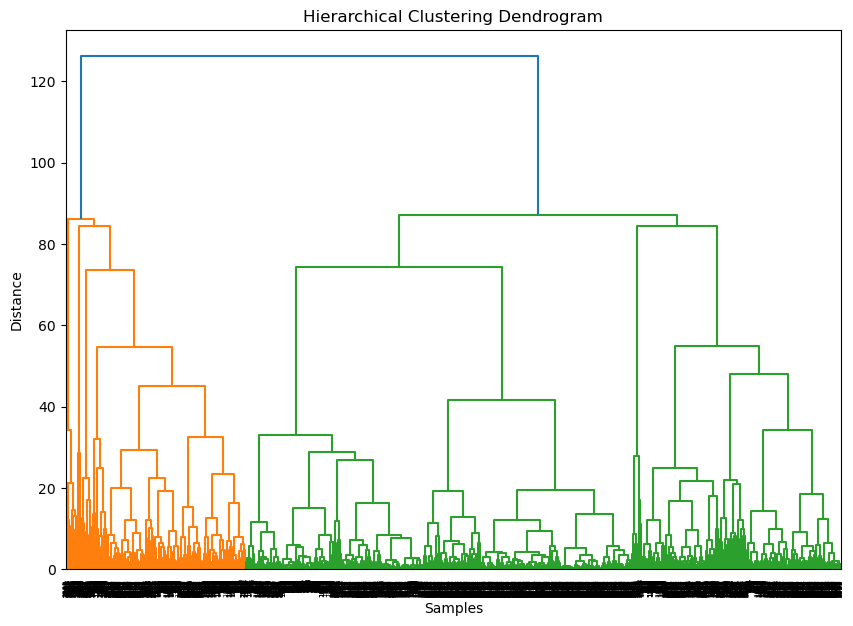

In [88]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [93]:
num_clusters = 2  # Adjust based on dendrogram
clusters_hierarchical = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add cluster labels to the DataFrame
df['Hierarchical_Cluster'] = clusters_hierarchical

# Silhouette Score
silhouette_hierarchical = silhouette_score(data_scaled, clusters_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.2f}")

Silhouette Score for Hierarchical Clustering: 0.33


In [99]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=10)  # Adjust parameters
clusters_dbscan = dbscan.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = clusters_dbscan

# Silhouette Score (only for clusters > 1)
if len(set(clusters_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, clusters_dbscan)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}")
else:
    print("DBSCAN resulted in a single cluster; Silhouette Score not calculated.")

Silhouette Score for DBSCAN: 0.12


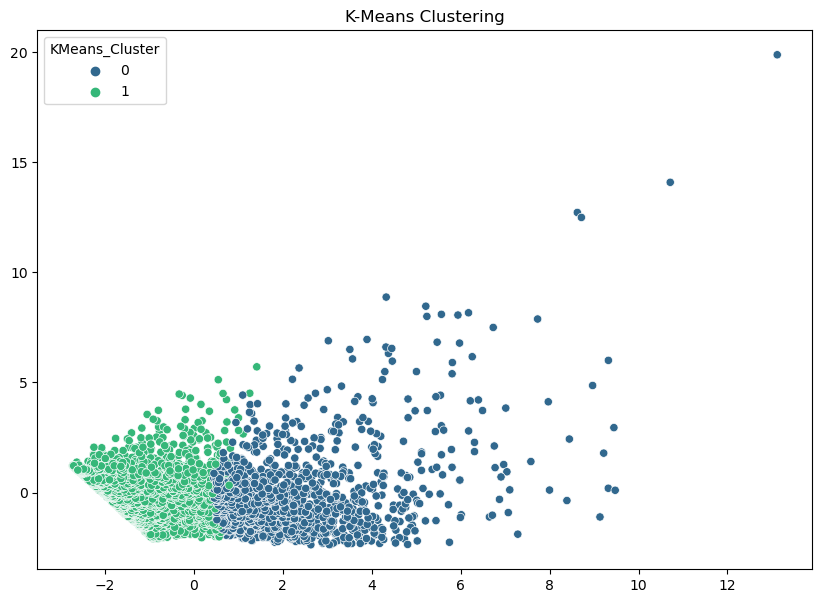

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

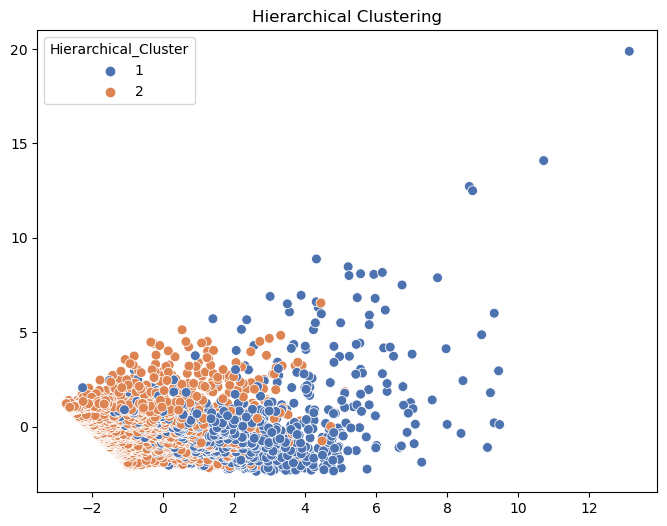

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue='Hierarchical_Cluster', palette='deep', data=df, s=50)
plt.title('Hierarchical Clustering')
plt.show()

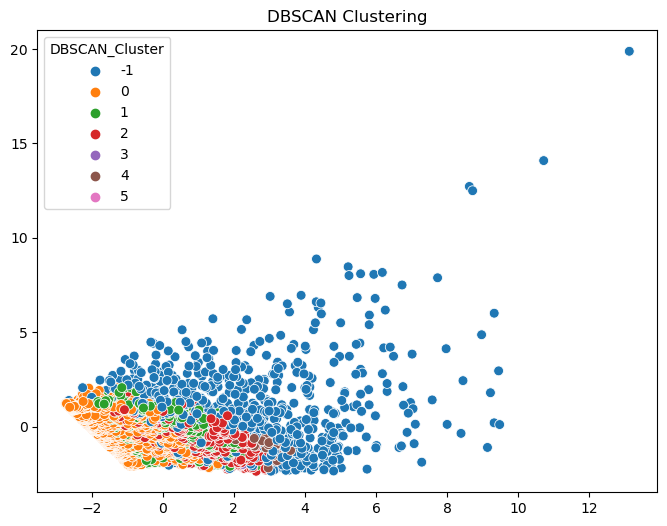

In [102]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue='DBSCAN_Cluster', palette='tab10', data=df, s=50)
plt.title('DBSCAN Clustering')
plt.show()

In [106]:
kmeans_summary = df.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Characteristics:\n")
kmeans_summary

K-Means Cluster Characteristics:



,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,Hierarchical_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,,,
0,1395.762128,147464.660407,270.259781,3.481221,1.007825,1.032081,40348.931142,19.730829,981.795775,2.935837,5243.009390,0.661189,0.828638,1.393584,0.266823
1,2305.578464,38909.177876,84.866593,1.391768,1.017641,1.002940,6246.345461,7.783903,215.004778,0.639838,3590.427416,0.233738,1.901507,1.943403,0.171628


In [107]:
hierarchical_summary = df.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Cluster Characteristics:\n")
hierarchical_summary


Hierarchical Cluster Characteristics:



,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,KMeans_Cluster,DBSCAN_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,,
1,1533.157158,189325.501615,415.143165,3.064586,1.000000,1.052745,36428.101184,17.623251,1013.795479,3.012917,5000.229279,0.493003,0.202368,0.165770,0.497309
2,2160.573290,38582.514007,62.099674,1.755375,1.018893,1.000000,11309.620195,9.779805,292.490879,0.877524,3851.760912,0.333225,1.969055,0.836156,0.112704


In [108]:
dbscan_summary = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
print("\nDBSCAN Cluster Characteristics:\n")
dbscan_summary


DBSCAN Cluster Characteristics:



,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,KMeans_Cluster,Hierarchical_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,,
0,2267.788072,33568.829606,0.867412,1.405218,1.0,1.0,5687.348243,7.165602,74.629925,0.268371,3633.374334,0.0,2.0,0.972311,2.0
1,1880.755527,36600.308192,3.250975,2.403121,1.0,1.0,18651.263979,11.720416,157.980494,0.522757,4365.044213,1.0,2.0,0.663199,2.0
2,1636.510000,147923.603333,0.000000,2.970000,1.0,1.0,24896.180000,13.323333,120.000000,0.343333,4801.866667,0.0,0.0,0.246667,1.0
3,503.050000,147387.950000,0.000000,2.950000,1.0,1.0,19008.750000,15.300000,165.000000,0.500000,6775.700000,1.0,0.0,0.000000,1.0
4,1392.000000,135367.192982,0.000000,4.333333,1.0,1.0,49363.859649,17.736842,92.982456,0.350877,5221.087719,1.0,0.0,0.000000,1.0
5,2805.238095,151087.095238,0.000000,1.000000,1.0,1.0,5935.857143,3.666667,349.476190,1.095238,2601.809524,1.0,0.0,0.952381,1.0


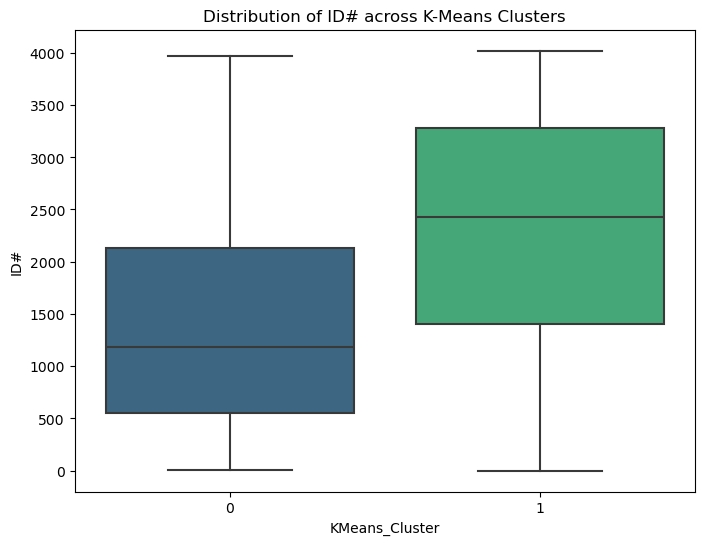

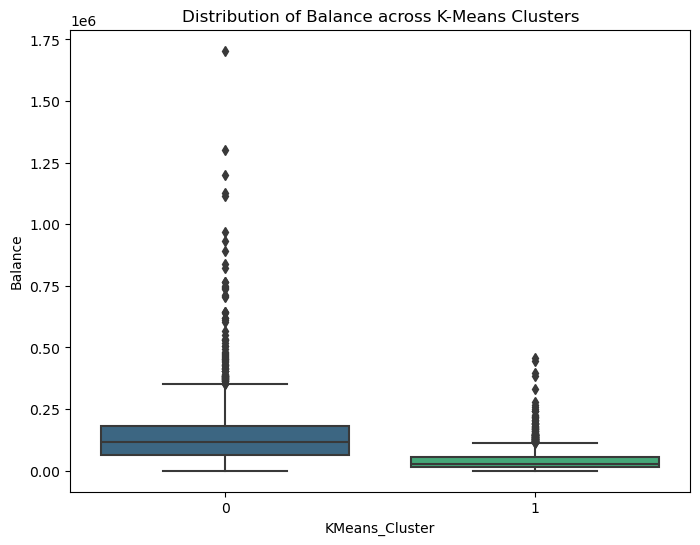

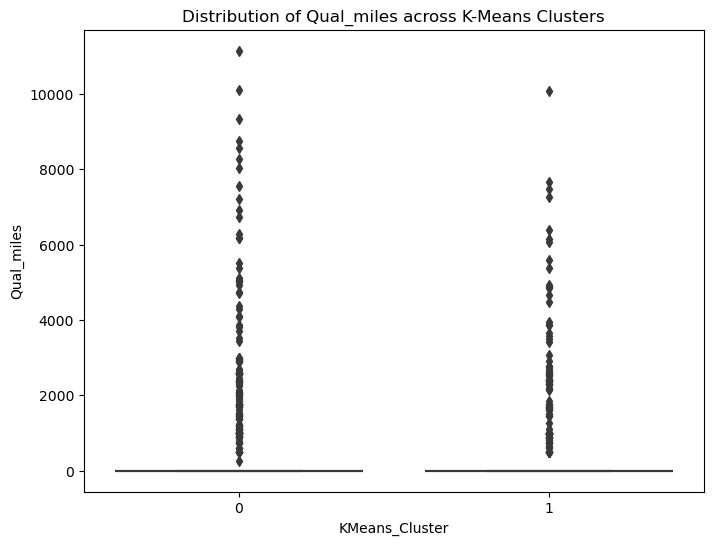

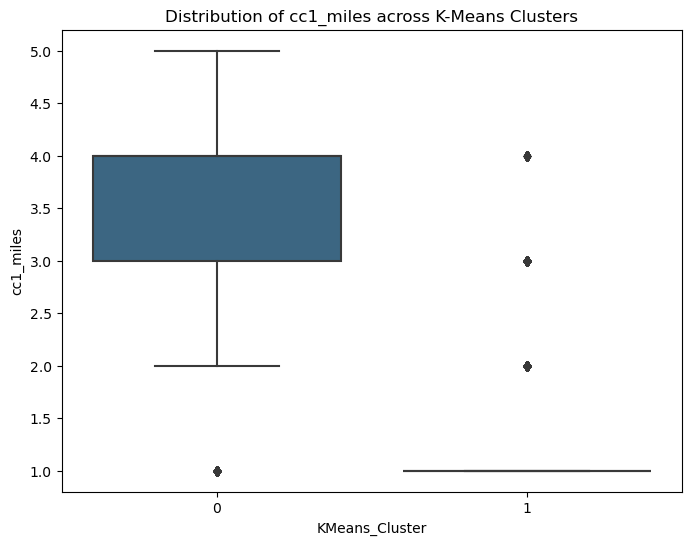

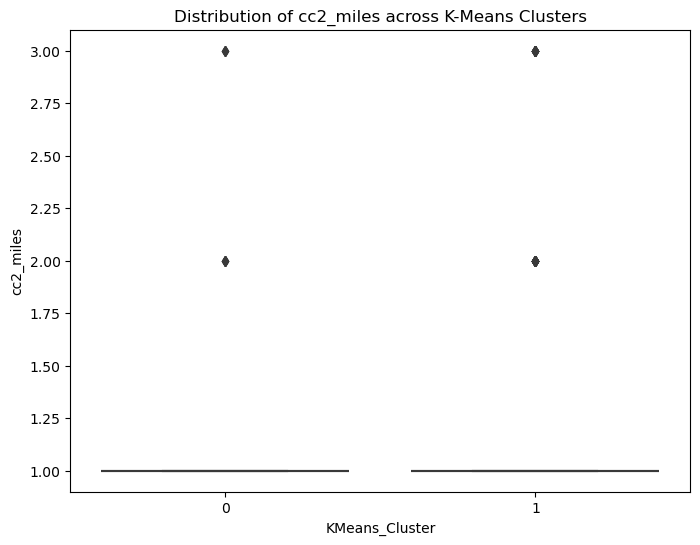

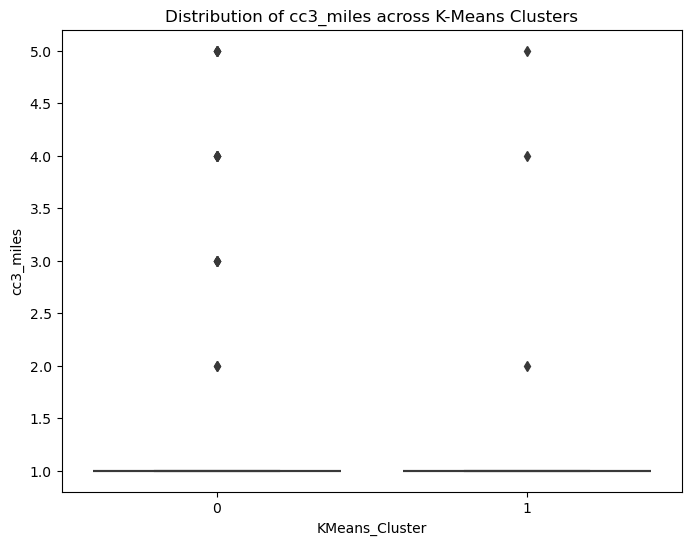

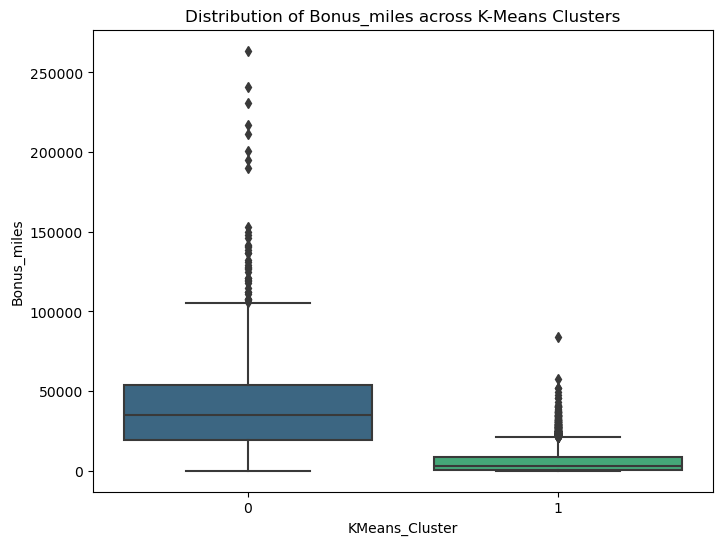

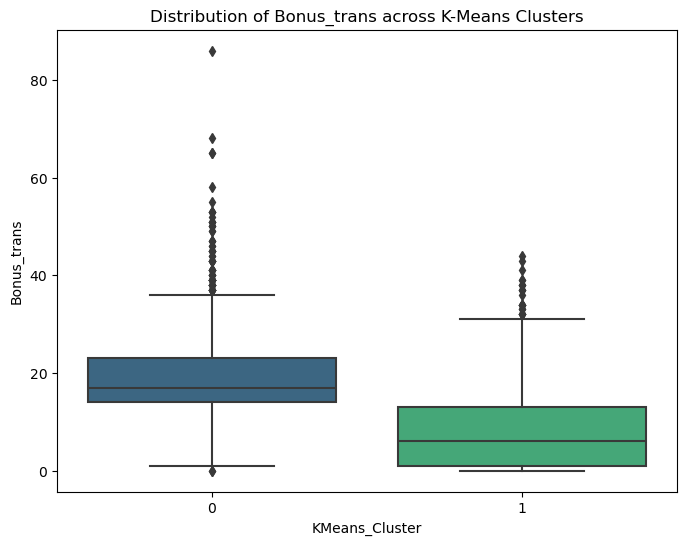

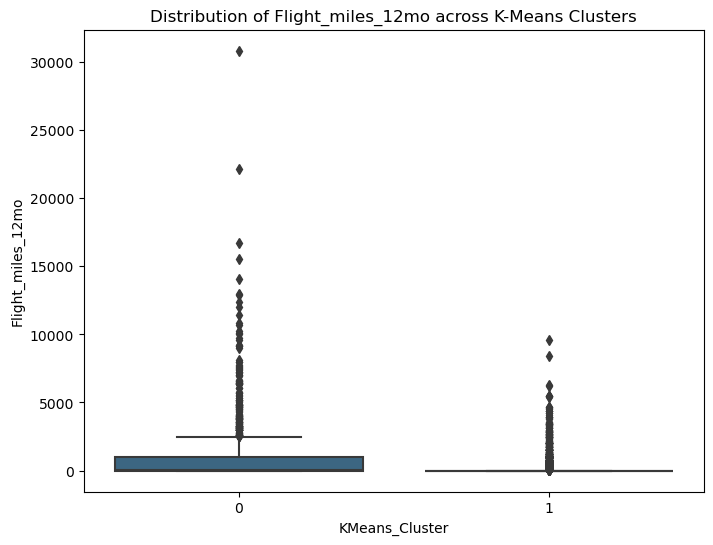

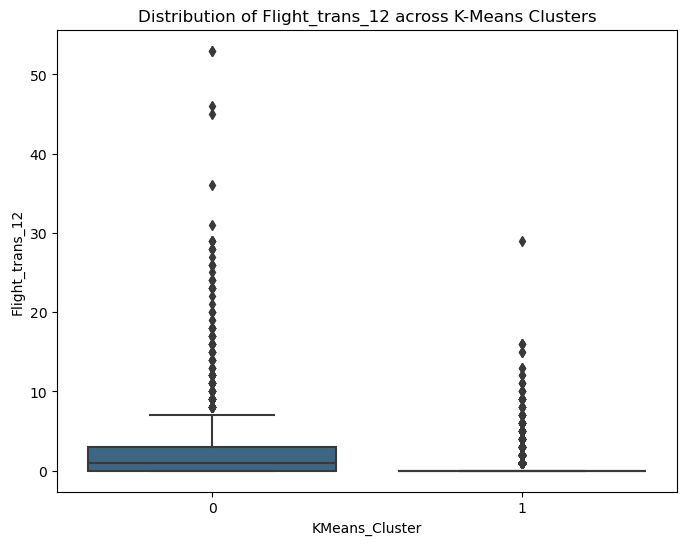

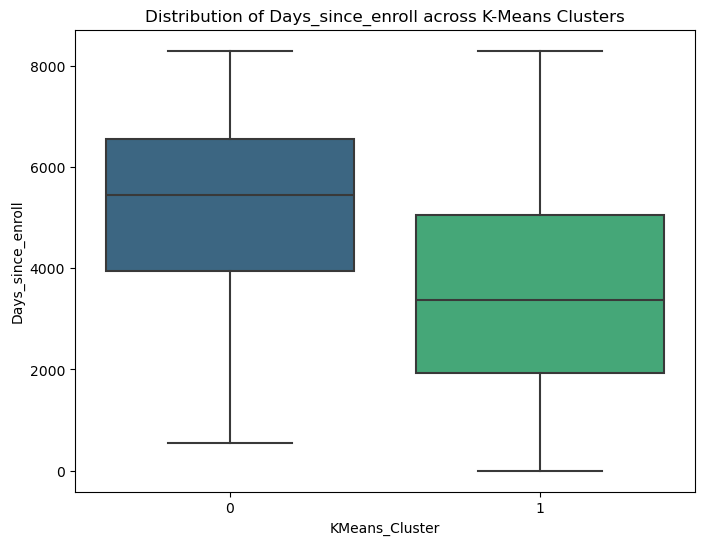

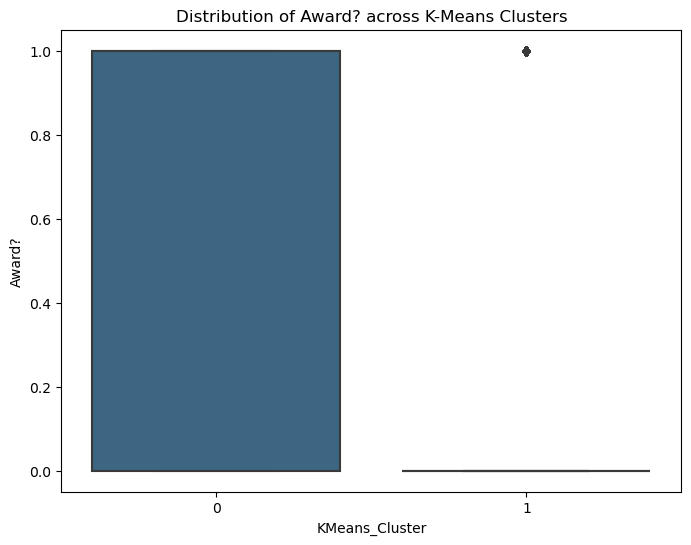

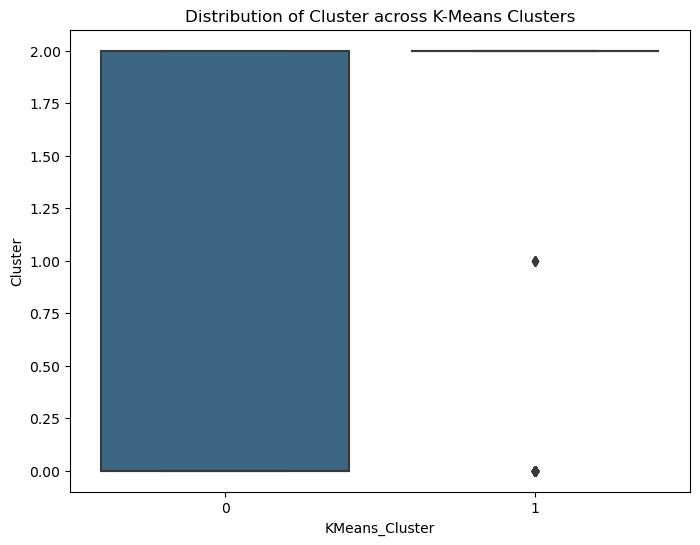

In [109]:
for feature in df.columns[:-3]:  # Exclude PCA and cluster columns
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature} across K-Means Clusters')
    plt.show()